# Pymaceuticals Inc.


___


### Analysis
1. The outlier of 36.22 mm3 in Infubinol Drug Treatment is statistically significant as if falls well below the calculated lower bound (47.31 mm3) and is substantially lower than the median tumor volume of 51.82 mm3. It represents a significant deviation from the typical response to Infubinol treatment in reducing tumor size for particular subject (Mouse ID : c326), warranting further investigation into the factors contributing to this unique outcome.
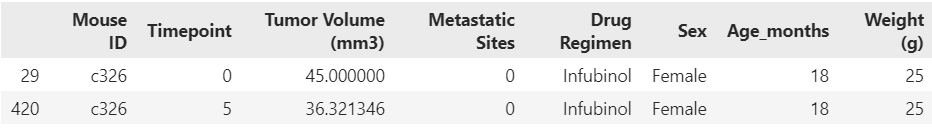
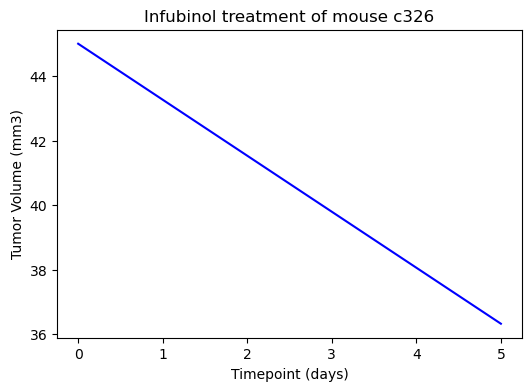

2. Overall, Capomulin and Ramicane show comparable efficacy in reducing tumor volume, with Ramicane having slightly lower mean and median tumor volumes, slighly lower variance, standard deviation, and standard error compared to Capomulin. However, these differences are relatively small, suggesting that both drugs are similarly effective in reducing tumor size.
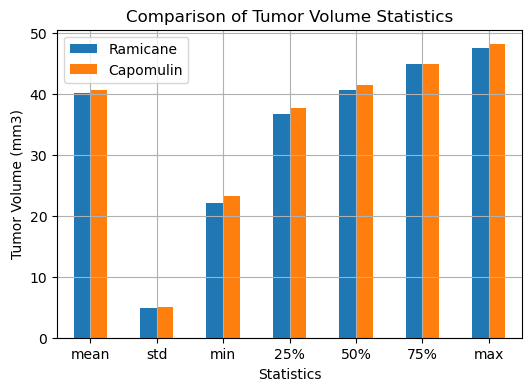

3. In the Capomulin regimen, there's more balanced gender distribution, with females making up a majority, compared to the Ramicane Regimen which has a significantly higher proportion of male subjects compared to female subjects. The imbalance in gender representation could influence the efficacy and side effects of each drug regimen.
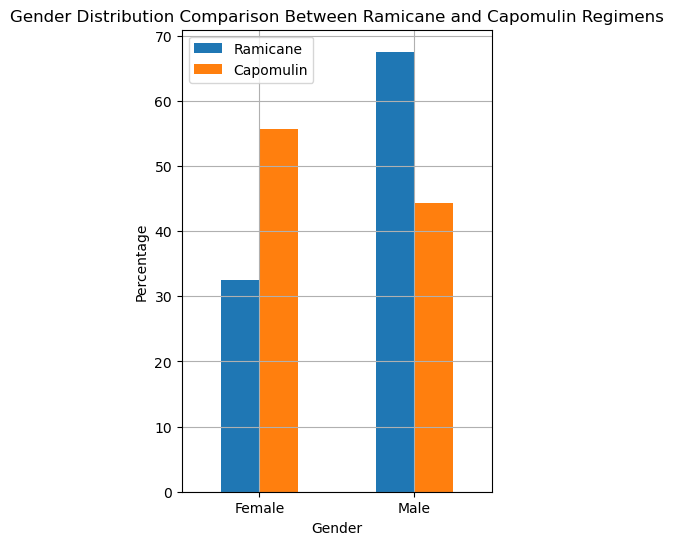 
 
4. In the Capomulin regimen, the strong positive correlation (0.84) between mouse weight and average tumor volume, with a p-value of 0.00 indicates a robust and statistically significant relationship. This indicates that weights is a significant factor in predicting average tumor volume, with heavier mice generally having larger average tumor volume. 

    On the other hand, in the Ramicane regimen, there's a weak negative correlation (-0.16) between mouse weight and average tumor volume and the p-value shows it is not statistically significant (0.45). Moreover, the Linear regression model does not strongly support the correlation and suggests a slight positive trend, indicating inconsistency.
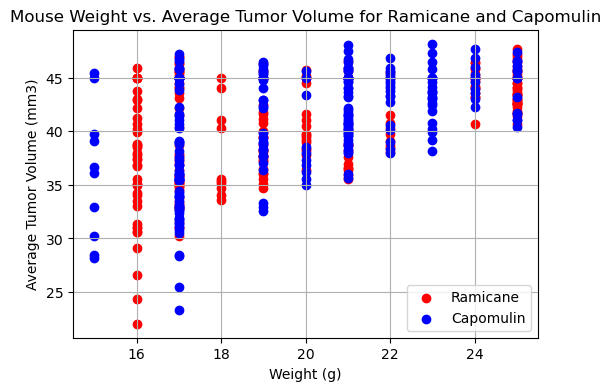
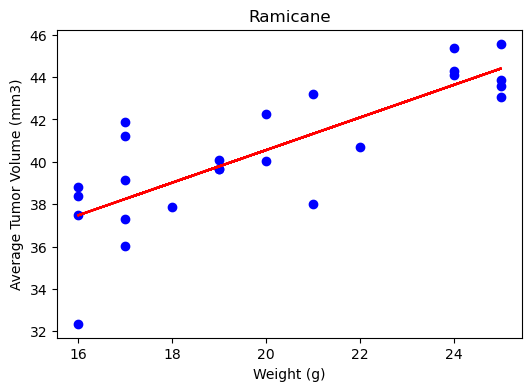


In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# Study data files
mouse_metadata_path = Path("..")/"data"/"Mouse_metadata.csv"
study_results_path = Path("..")/"data"/"Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study_results = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
complete_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(complete_study_results['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_study_results[complete_study_results.duplicated(subset=["Mouse ID", "Timepoint"],keep = False)]
duplicates_mouse_id = duplicates["Mouse ID"].unique()
duplicates_mouse_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouse_data = complete_study_results[complete_study_results["Mouse ID"].isin(duplicates_mouse_id)]
duplicates_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_study_results[~complete_study_results["Mouse ID"].isin(duplicates_mouse_id)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned_df=len(cleaned_df["Mouse ID"].unique())
mice_count_cleaned_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Variance_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Standev_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
cleaned_df_dict = {
    'Mean Tumor Volume' : Mean_tumor_volume,
    'Median Tumor Volume' : Median_tumor_volume,
    'Tumor Volume Variance' : Variance_tumor_volume,
    'Tumor Volume Std. Dev.' : Standev_tumor_volume,
    'Tumor Volume Std. Err.' : SEM_tumor_volume}

# Create DataFrame
cleaned_df_summary = pd.DataFrame(cleaned_df_dict)

# Display the cleaned_df_summary DataFrame
cleaned_df_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = 'mean',
    median = 'median',
    var = 'var',
    std = 'std',
    sem = 'sem'
)

# Display the aggregated DataFrame
summary_stats.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"],summary_stats.columns])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

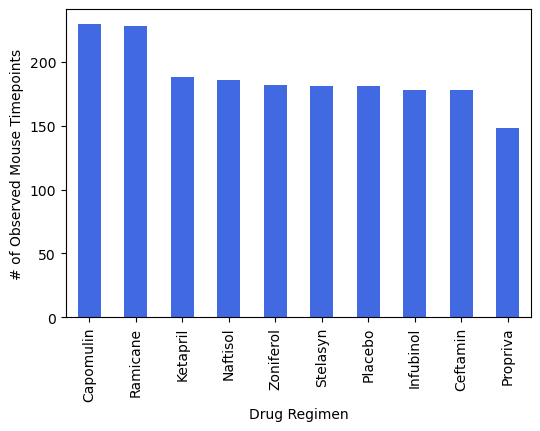

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_df['Drug Regimen'].value_counts()
counts.plot(kind='bar',figsize=(6,4),color='royalblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


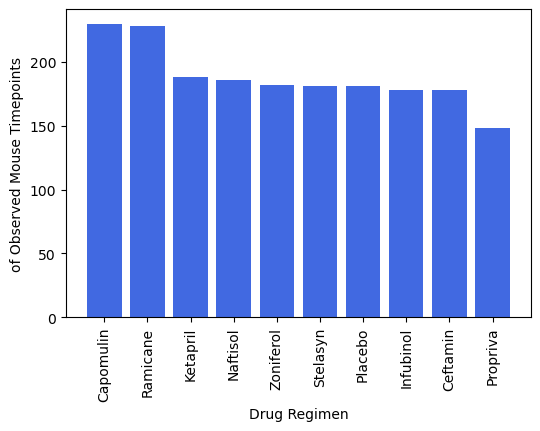

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6,4))
plt.xticks(rotation=90)
plt.bar(counts.index, counts.values, color='royalblue')

plt.xlabel('Drug Regimen')
plt.ylabel('of Observed Mouse Timepoints')

plt.show()

In [11]:
# Count the population of male and female
gender_count = cleaned_df["Sex"] .value_counts(normalize=True) *100 


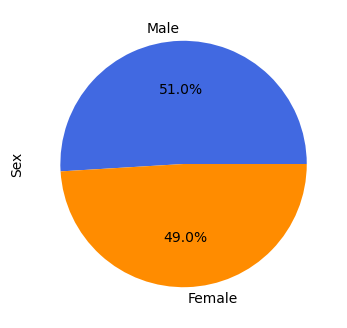

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(4,4))
gender_count.plot(kind='pie', autopct = '%1.1f%%', startangle=0, colors=['royalblue','darkorange'], labels=['Male','Female'])
plt.xlabel('')
plt.ylabel('Sex')

plt.show()


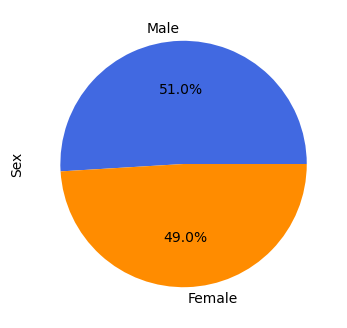

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4,4))
plt.pie(gender_count, labels=gender_count.index, autopct = '%1.1f%%', startangle=0, colors=['royalblue','darkorange'])

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_max = cleaned_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
cleaned_df_max

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_tumor_volume = pd.merge(cleaned_df_max, cleaned_df, how="left",on=['Mouse ID','Timepoint'])
last_timepoint_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regime = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

final_tumor_volume = last_timepoint_tumor_volume[last_timepoint_tumor_volume["Drug Regimen"].isin(treatment_regime)]

# Create a dictionary to store data for each treatment
treatment_data = {}
for treatment in treatment_regime:
    treatment_data[treatment] = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatment_regime:
    tumor_vol_data.append(treatment_data[treatment]["Tumor Volume (mm3)"].tolist())

# Locate the rows which contain mice on each drug and get the tumor volumes
outliers = {}

for treatment in treatment_regime:
    tumor_volumes = treatment_data[treatment]["Tumor Volume (mm3)"]

    # add subset 
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 *IQR)
    upper_bound = Q3 + (1.5 *IQR)
    outliers[treatment] = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

for treatment in treatment_regime:
    print(f"{treatment}'s potential outliers:")
    print(outliers[treatment])
    
    

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


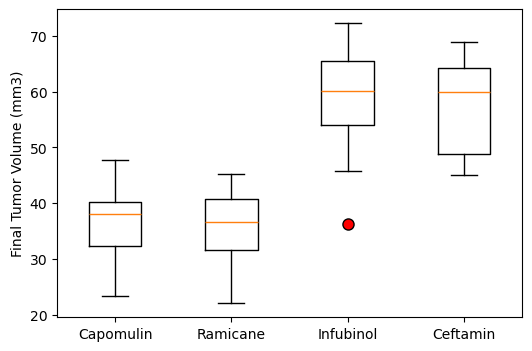

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6,4))

flierprops = dict(marker='o', markerfacecolor='red',markersize = 8, linestyle = 'none')
plt.boxplot(tumor_vol_data, labels = treatment_regime, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

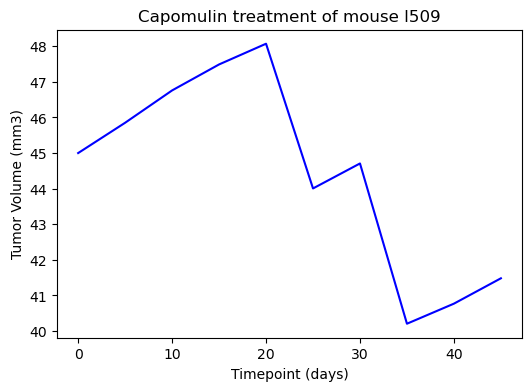

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = 'l509'
single_mouse_treatment = cleaned_df[(cleaned_df['Mouse ID'] == single_mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]
single_mouse_treatment

plt.figure(figsize=(6,4))
plt.plot(single_mouse_treatment['Timepoint'], single_mouse_treatment['Tumor Volume (mm3)'], linestyle='-', color='b')

plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel(f'Timepoint (days)')
plt.ylabel(f'Tumor Volume (mm3)')

plt.show()


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin Regimen
Capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Average tumor volume for each mouse
avg_tumor_volume = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})

# Merge the average tumor volume data with the original DataFrame to get mouse weight
merged_data = pd.merge(avg_tumor_volume,Capomulin_data[['Mouse ID','Weight (g)']].drop_duplicates(), on='Mouse ID')


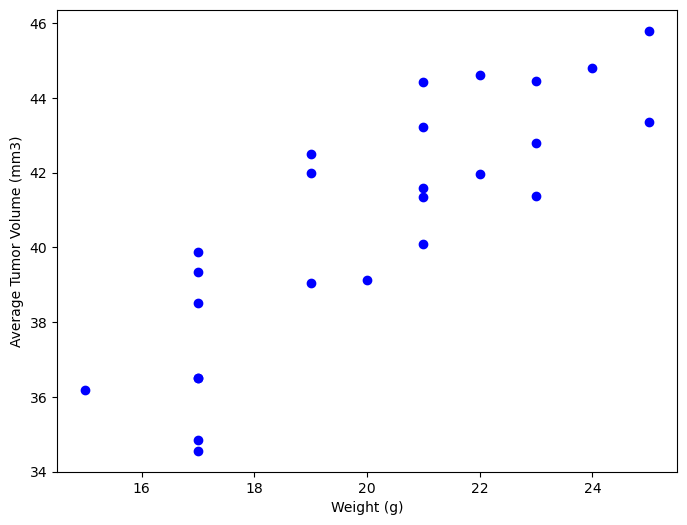

In [19]:
# Generate scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], marker='o', color='b')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
p-value: 0.00
Linear regression model: Average Tumor Volume = 0.95 * Weight + 21.55


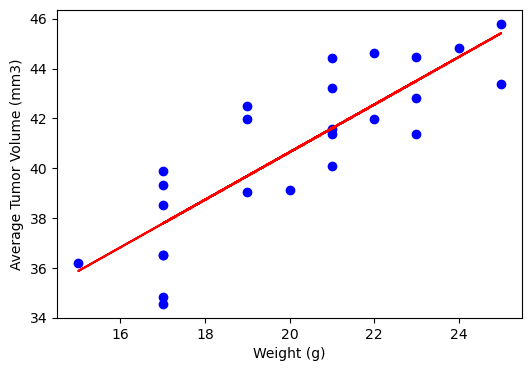

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation, p_value = pearsonr(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')
print(f'p-value: {p_value:.2f}')

# Fit a linear regression model
x = merged_data[['Weight (g)']]
y = merged_data['Average Tumor Volume (mm3)']
model = LinearRegression()
model.fit(x,y)

slope = model.coef_[0]
intercept = model.intercept_
print (f'Linear regression model: Average Tumor Volume = {slope:.2f} * Weight + {intercept:.2f}')

# Generate the scatter plot with the regression line
plt.figure(figsize=(6,4))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], marker='o', color='b')
plt.plot(merged_data['Weight (g)'],model.predict(x), color='r', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
